## Практическое задание 1 (30%)

### Реализуйте PCA

In [1]:
import numpy as np
import pylab as plt
import scipy.linalg
'''
Performs the Principal Coponent analysis of the Matrix F
Matrix must be n * l dimensions
where n is # features
l is # samples
'''

def PCA(F, varRetained = 0.95, show = False):
    # Input
    #     F - initaial matrix 
    # Compute Covariance Matrix Sigma
    # Input
    (n, l) = F.shape
    Sigma = 1.0 / l * F.T.dot(F)
   
    V, d, U = scipy.linalg.svd(F) # TUT BILA BAGA, HOTELI SVD DLYA SIGMI
    print('U {}shape'.format(U.shape))
    print('V {}shape'.format(V.shape))
    # compute the value m: number of minumum features that retains the given variance varRetaine
    dTot = np.sum(d)
    var_i = np.array([np.sum(d[: i + 1]) / \
                dTot * 100.0 for i in range(n)])
    m = np.where(var_i >= varRetained * 100)[0][0] # :(
    print '%.2f %% variance retained in %d dimensions' % (var_i[m], m + 1)

    # plot the variance plot
    if show:
        plt.figure(figsize=(15,7))
        plt.plot(var_i)
        plt.xlabel('Number of Features')
        plt.ylabel(' Percentage Variance retained')
        plt.title('PCA $\% \sigma^2 $ vs # features')
        plt.show()

    # compute the reduced dimensional features by projection
    U_reduced = U[:, :m]
    print('U_red {}shape'.format(U_reduced.shape))
    G = F.dot(U_reduced)

    return G, U_reduced

In [2]:
# Примените алгоритм к данным MNIST
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.7)

Performing PCA - Principal COmponent Analysis
U (1797, 1797)shape
V (64, 64)shape
95.07 % variance retained in 41 dimensions


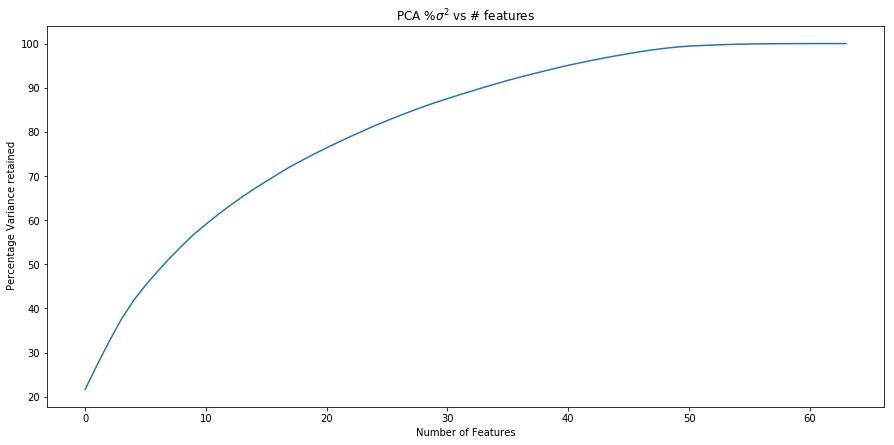

U_red (1797, 40)shape


In [3]:

#################################################################
# PCA of training set
print 'Performing PCA - Principal COmponent Analysis'

Z, U_reduced = PCA(X.T, varRetained = 0.95, show = True)

## Практическое задание 2 (40%)

## Изучение алгоритмов кластеризации на разных выборках


### Кластеризация цифр с помощью dbscan


На данных из sklearn.datasets.load_digits примените алгоритмы кластеризации (знания о метках классов при кластеризации использовать нельзя):


- dbscan запускайте при различных параметрах eps и minsamples, для всех экспериментов можете выбрать одну метрику (вспомните семинар про метрические алгоритмы);
- Используя метки классов цифр, оцените качество различных кластеризаций при помощи Adjusted Mutual Information и Adjusted Rand Index.
- визуалируйте изображения тех цифр, которые соответствуют core_points;
- визуалируйте изображения тех цифр, которые соответствуют выбросам;
- сделайте выводы и применимости алгоритмов

### Уменьшение палитры изображения


- для картинки нужно уменьшить число цветов в палитре; для этого нужно выделить кластеры в пространстве RGB, объекты соответствуют пикселам изображения; после выделения кластеров, все пикселы, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру.

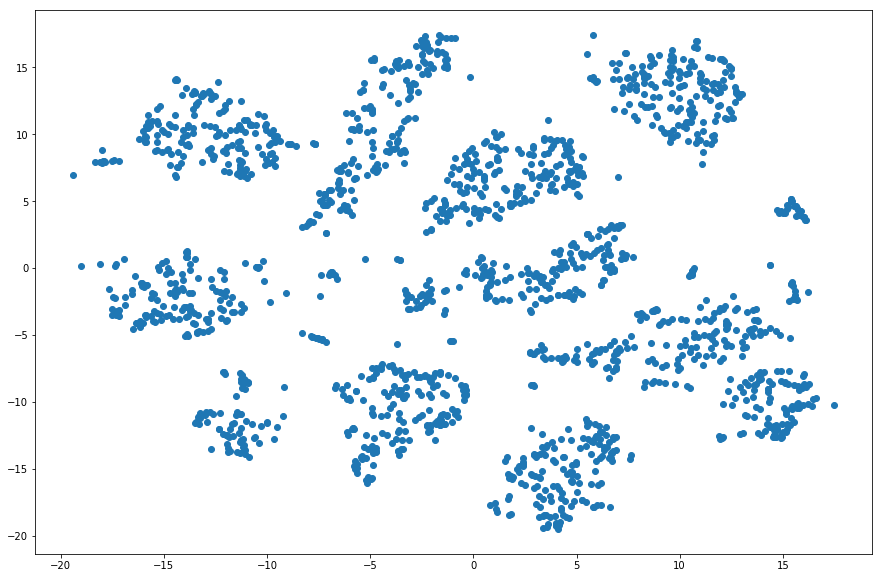

In [6]:
%matplotlib inline
from sklearn.datasets import load_digits
digits_data = load_digits()
digits = digits_data.data
from sklearn.cluster import *
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_digits = tsne.fit_transform(digits)


plt.figure(figsize=(15,10))
plt.scatter(tsne_digits[:,0], tsne_digits[:,1])

In [7]:
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score
from color_generator import ColorGenerator
clrs = []
col_gen = ColorGenerator()
for _ in range(1000):
    clrs.append(col_gen.get_color())
clrs = np.array(clrs)
plt.figure(figsize=(15,10))
plt.scatter(tsne_digits[:,0], tsne_digits[:,1], c=clrs[digits_data.target])

ImportError: No module named color_generator

In [14]:
def apply_clustering(estimator, verbosity = True, **kwargs):
    final_est = estimator(**kwargs)
    estimator_predictions = final_est.fit_predict(digits)
    if(verbosity == True):
        print('AMI is equal to {}'.format(adjusted_mutual_info_score(estimator_predictions,
                                                                     digits_data.target
        )))
        print('AR is equal to {}'.format(adjusted_rand_score(estimator_predictions,
                                                             digits_data.target)))
        plt.figure(figsize=(15,10))
        plt.scatter(tsne_digits[:,0], tsne_digits[:,1], c=clrs[estimator_predictions])
    return final_est, adjusted_mutual_info_score(estimator_predictions, digits_data.target), \
        adjusted_rand_score(estimator_predictions, digits_data.target)

In [15]:
from sklearn.cluster import KMeans
kmennnn = apply_clustering(KMeans, n_clusters=10)

AMI is equal to 0.732433636642
AR is equal to 0.665773985748


NameError: global name 'clrs' is not defined